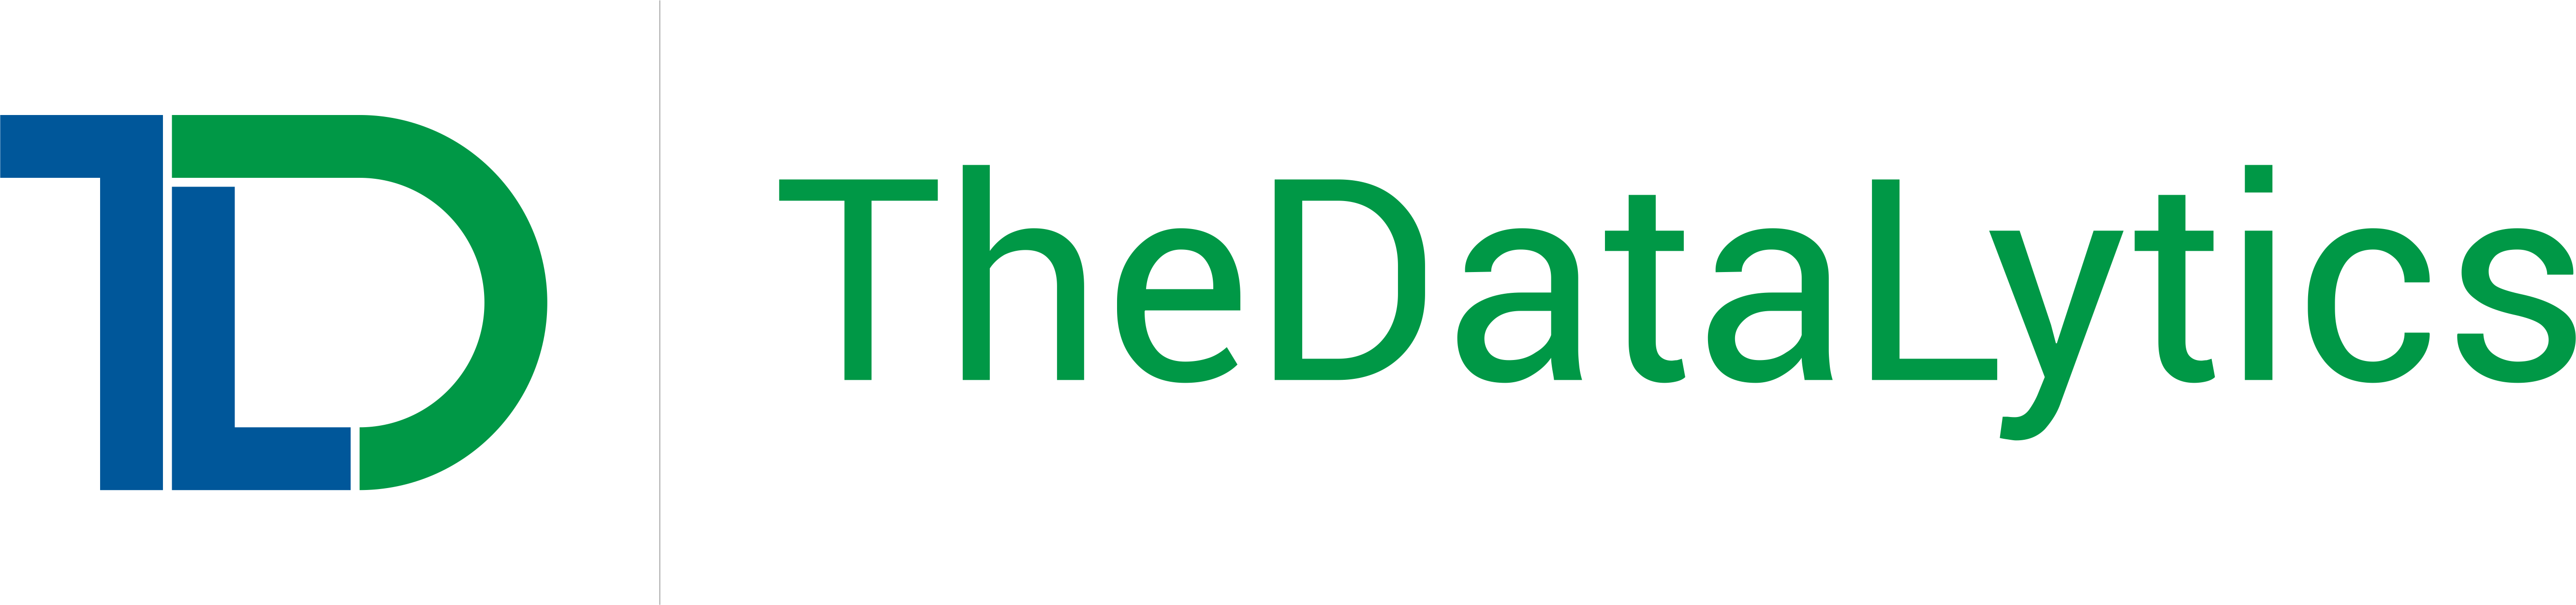

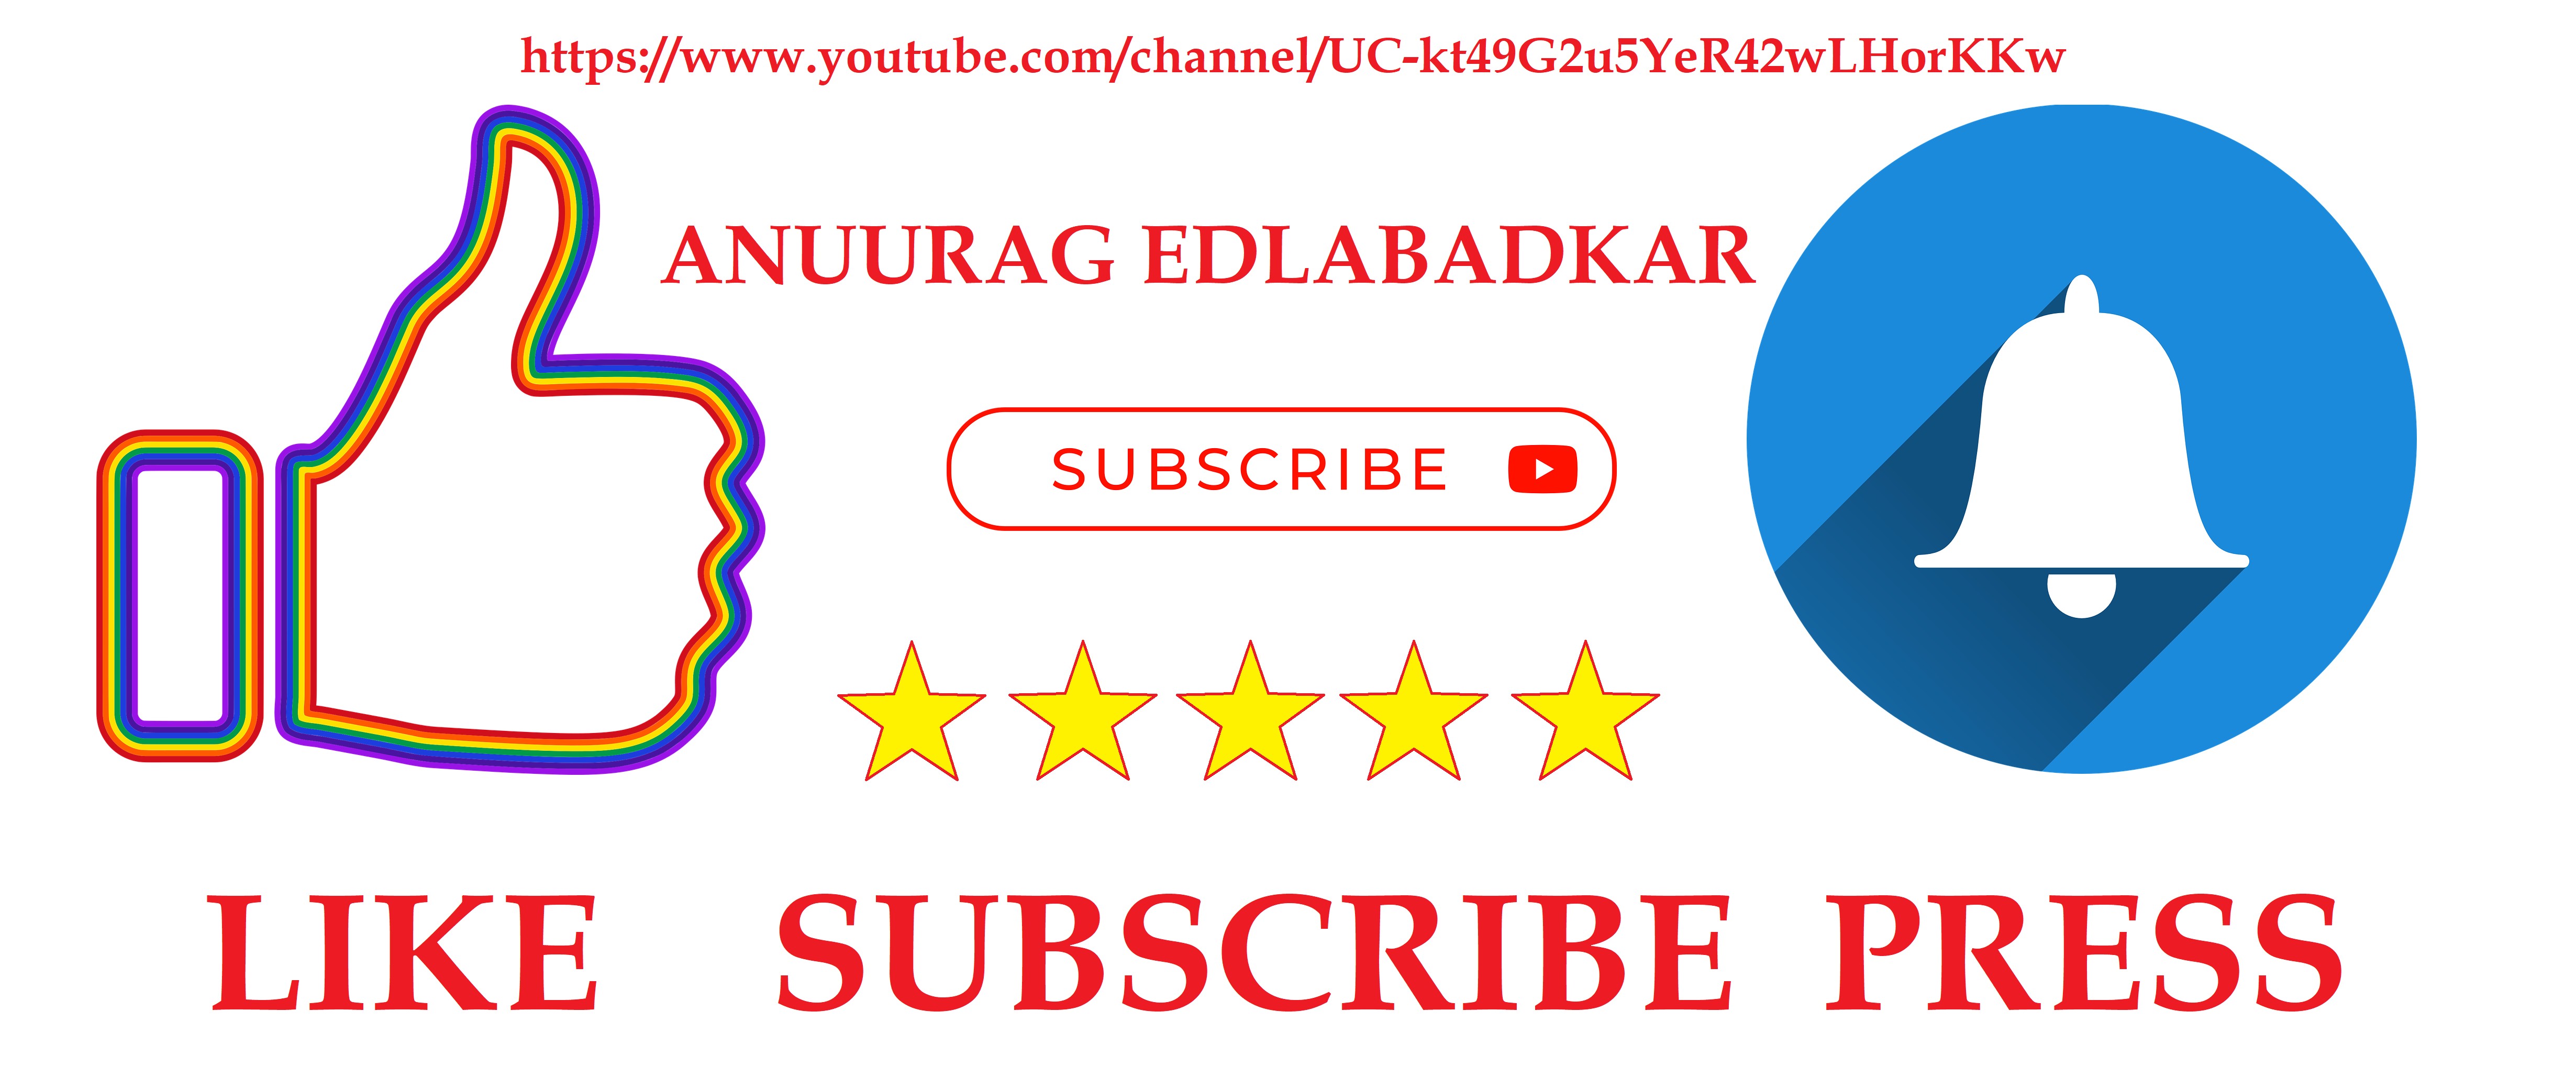

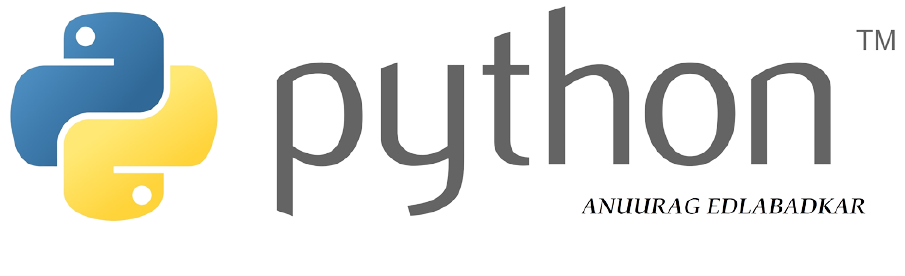

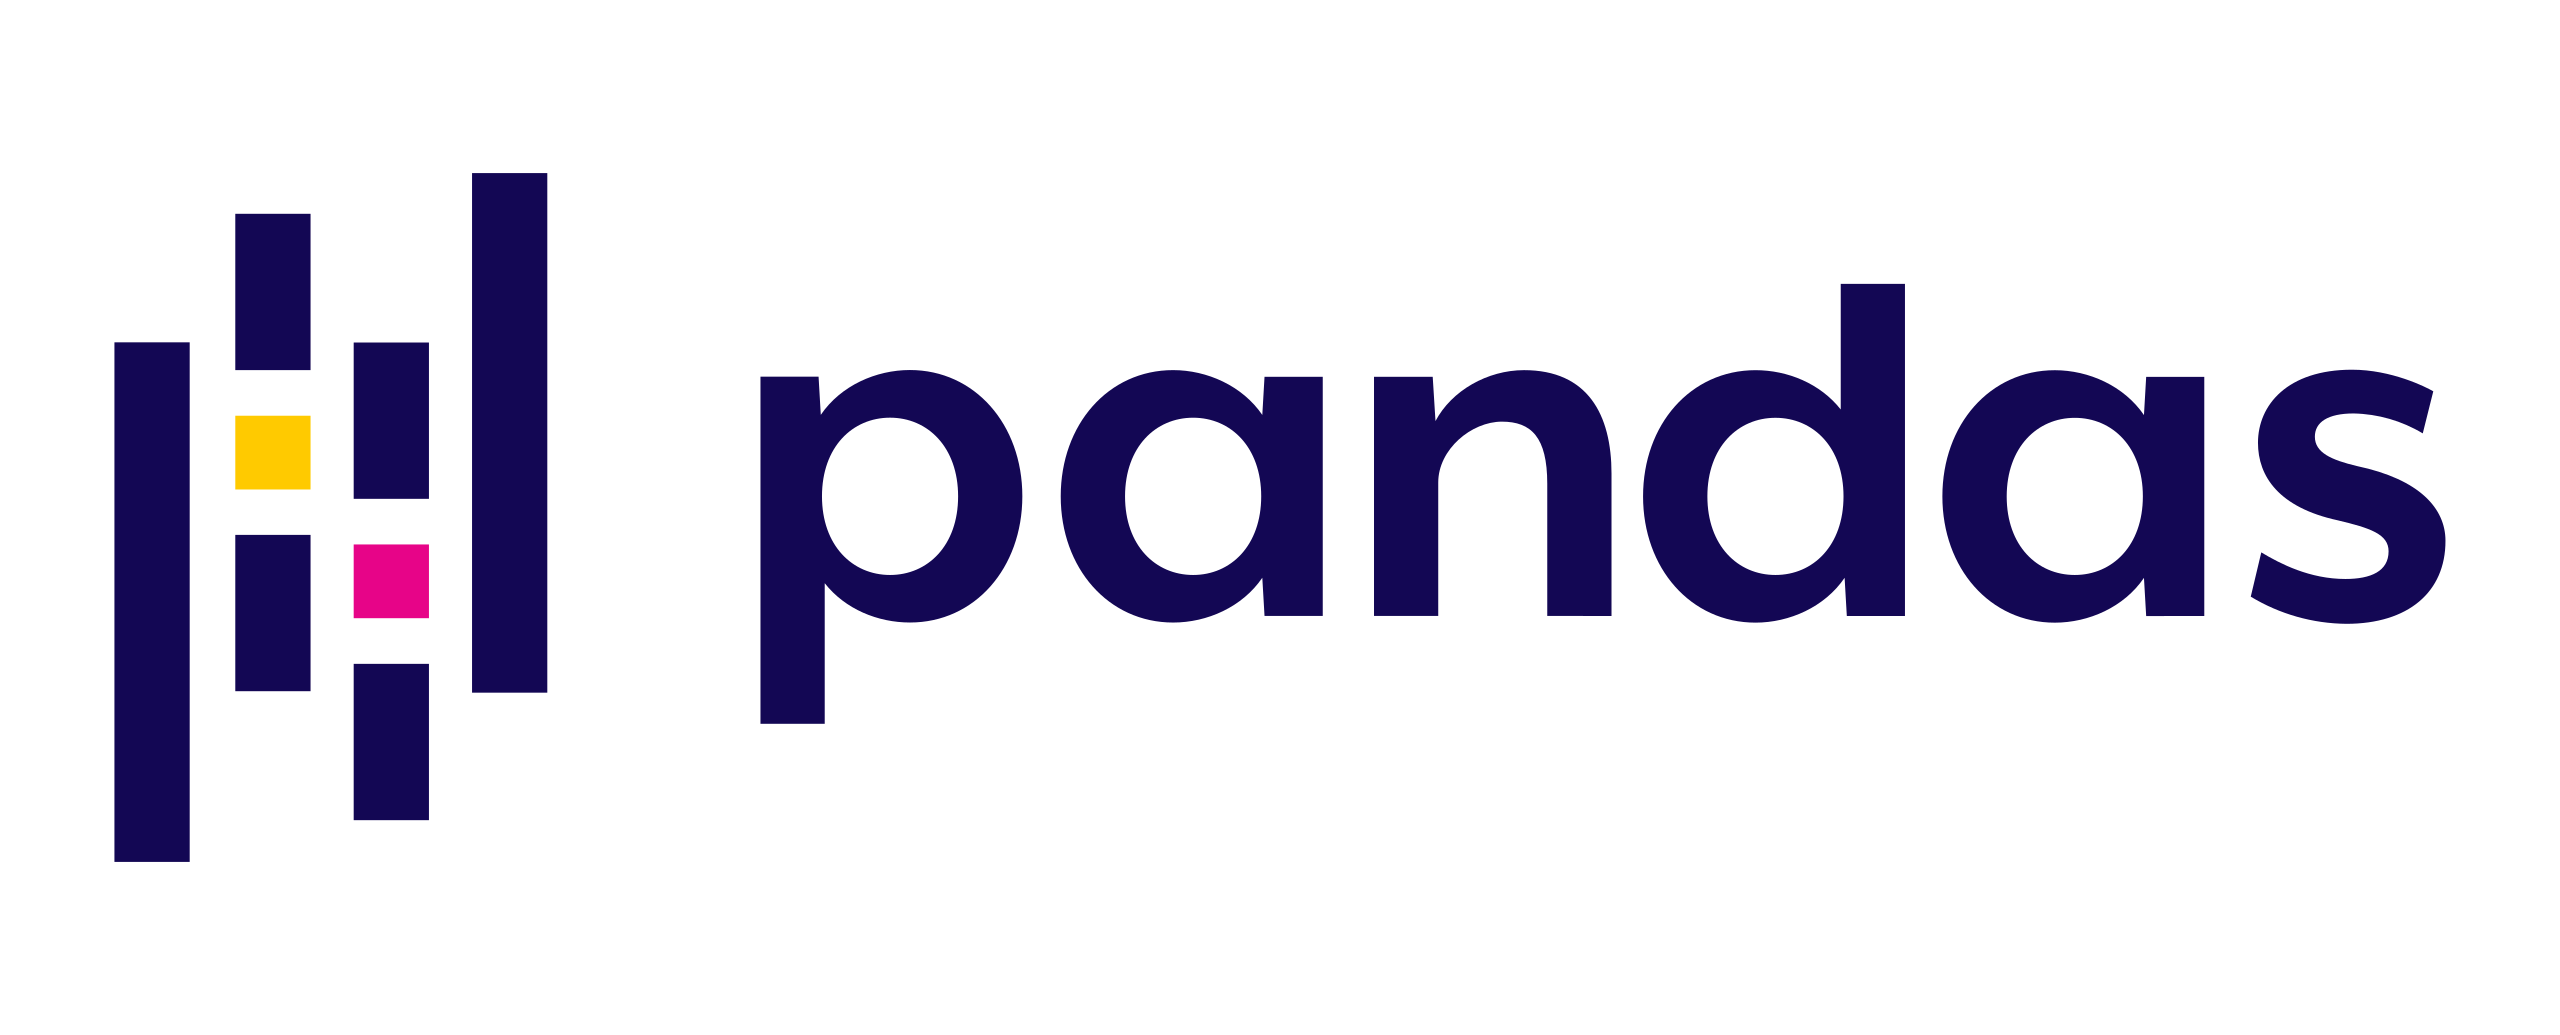

In [6]:
import pandas as pd
import numpy as np

In [7]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
df_chipotle = pd.read_csv(url, sep = '\t')
df_chipotle

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [8]:
# clean the item_price column and transform it in a float
prices = [float(value[1 : -1]) for value in df_chipotle.item_price]

# reassign the column with the cleaned prices
df_chipotle.item_price = prices 

# make the comparison
chipo10 = df_chipotle[df_chipotle['item_price'] > 10.00]
chipo10.head()

len(chipo10)

1130

In [9]:
# delete the duplicates in item_name and quantity
chipo_filtered = df_chipotle.drop_duplicates(['item_name','quantity'])

# select only the products with quantity equals to 1
chipo_one_prod = chipo_filtered[chipo_filtered.quantity == 1]

# select only the item_name and item_price columns
price_per_item = chipo_one_prod[['item_name', 'item_price']]

# sort the values from the most to less expensive
price_per_item.sort_values(by = "item_price", ascending = False)

,item_name,item_price
606,Steak Salad Bowl,11.89
1229,Barbacoa Salad Bowl,11.89
1132,Carnitas Salad Bowl,11.89
7,Steak Burrito,11.75
168,Barbacoa Crispy Tacos,11.75
39,Barbacoa Bowl,11.75
738,Veggie Soft Tacos,11.25
186,Veggie Salad Bowl,11.25
62,Veggie Bowl,11.25
57,Veggie Burrito,11.25


In [11]:
df_chipotle.item_name.sort_values()

3389    6 Pack Soft Drink
341     6 Pack Soft Drink
1849    6 Pack Soft Drink
1860    6 Pack Soft Drink
2713    6 Pack Soft Drink
              ...        
2384    Veggie Soft Tacos
781     Veggie Soft Tacos
2851    Veggie Soft Tacos
1699    Veggie Soft Tacos
1395    Veggie Soft Tacos
Name: item_name, Length: 4622, dtype: object

In [12]:
df_chipotle.sort_values(by = "item_name")

,order_id,quantity,item_name,choice_description,item_price
3389,1360,2,6 Pack Soft Drink,[Diet Coke],12.98
341,148,1,6 Pack Soft Drink,[Diet Coke],6.49
1849,749,1,6 Pack Soft Drink,[Coke],6.49
1860,754,1,6 Pack Soft Drink,[Diet Coke],6.49
2713,1076,1,6 Pack Soft Drink,[Coke],6.49
...,...,...,...,...,...
2384,948,1,Veggie Soft Tacos,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",8.75
781,322,1,Veggie Soft Tacos,"[Fresh Tomato Salsa, [Black Beans, Cheese, Sou...",8.75
2851,1132,1,Veggie Soft Tacos,"[Roasted Chili Corn Salsa (Medium), [Black Bea...",8.49
1699,688,1,Veggie Soft Tacos,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25


In [13]:
df_chipotle.sort_values(by = "item_price", ascending = False).head(1)

,order_id,quantity,item_name,choice_description,item_price
3598,1443,15,Chips and Fresh Tomato Salsa,NaN,44.25


In [15]:
chipo_salad = df_chipotle[df_chipotle.item_name == "Veggie Salad Bowl"]
chipo_salad

,order_id,quantity,item_name,choice_description,item_price
186,83,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
295,128,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",11.25
455,195,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
496,207,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Rice, Lettuce, Guacamole...",11.25
960,394,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75
1316,536,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.75
1884,760,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
2156,869,1,Veggie Salad Bowl,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.25
2223,896,1,Veggie Salad Bowl,"[Roasted Chili Corn Salsa, Fajita Vegetables]",8.75
2269,913,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.75


In [16]:
chipo_drink_steak_bowl = df_chipotle[(df_chipotle.item_name == "Canned Soda") & (df_chipotle.quantity > 1)]
len(chipo_drink_steak_bowl)

20

In [17]:
# Create an example dataframe about a fictional army
raw_data = {'regiment': ['Nighthawks', 'Nighthawks', 'Nighthawks', 'Nighthawks', 'Dragoons', 'Dragoons', 'Dragoons', 'Dragoons', 'Scouts', 'Scouts', 'Scouts', 'Scouts'],
            'company': ['1st', '1st', '2nd', '2nd', '1st', '1st', '2nd', '2nd','1st', '1st', '2nd', '2nd'],
            'deaths': [523, 52, 25, 616, 43, 234, 523, 62, 62, 73, 37, 35],
            'battles': [5, 42, 2, 2, 4, 7, 8, 3, 4, 7, 8, 9],
            'size': [1045, 957, 1099, 1400, 1592, 1006, 987, 849, 973, 1005, 1099, 1523],
            'veterans': [1, 5, 62, 26, 73, 37, 949, 48, 48, 435, 63, 345],
            'readiness': [1, 2, 3, 3, 2, 1, 2, 3, 2, 1, 2, 3],
            'armored': [1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1],
            'deserters': [4, 24, 31, 2, 3, 4, 24, 31, 2, 3, 2, 3],
            'origin': ['Arizona', 'California', 'Texas', 'Florida', 'Maine', 'Iowa', 'Alaska', 'Washington', 'Oregon', 'Wyoming', 'Louisana', 'Georgia']}

In [18]:
army = pd.DataFrame(raw_data, columns = ['regiment', 'company', 'deaths', 'battles', 'size', 'veterans', 'readiness', 'armored', 'deserters', 'origin'])

In [19]:
army

,regiment,company,deaths,battles,size,veterans,readiness,armored,deserters,origin
0,Nighthawks,1st,523,5,1045,1,1,1,4,Arizona
1,Nighthawks,1st,52,42,957,5,2,0,24,California
2,Nighthawks,2nd,25,2,1099,62,3,1,31,Texas
3,Nighthawks,2nd,616,2,1400,26,3,1,2,Florida
4,Dragoons,1st,43,4,1592,73,2,0,3,Maine
5,Dragoons,1st,234,7,1006,37,1,1,4,Iowa
6,Dragoons,2nd,523,8,987,949,2,0,24,Alaska
7,Dragoons,2nd,62,3,849,48,3,1,31,Washington
8,Scouts,1st,62,4,973,48,2,0,2,Oregon
9,Scouts,1st,73,7,1005,435,1,0,3,Wyoming


In [20]:
army = army.set_index('origin')
army

,regiment,company,deaths,battles,size,veterans,readiness,armored,deserters
origin,,,,,,,,,
Arizona,Nighthawks,1st,523,5,1045,1,1,1,4
California,Nighthawks,1st,52,42,957,5,2,0,24
Texas,Nighthawks,2nd,25,2,1099,62,3,1,31
Florida,Nighthawks,2nd,616,2,1400,26,3,1,2
Maine,Dragoons,1st,43,4,1592,73,2,0,3
Iowa,Dragoons,1st,234,7,1006,37,1,1,4
Alaska,Dragoons,2nd,523,8,987,949,2,0,24
Washington,Dragoons,2nd,62,3,849,48,3,1,31
Oregon,Scouts,1st,62,4,973,48,2,0,2


In [21]:
army['veterans']

origin
Arizona         1
California      5
Texas          62
Florida        26
Maine          73
Iowa           37
Alaska        949
Washington     48
Oregon         48
Wyoming       435
Louisana       63
Georgia       345
Name: veterans, dtype: int64

In [22]:
army[['veterans', 'deaths']]

,veterans,deaths
origin,,
Arizona,1,523
California,5,52
Texas,62,25
Florida,26,616
Maine,73,43
Iowa,37,234
Alaska,949,523
Washington,48,62
Oregon,48,62


In [23]:
army.columns

Index(['regiment', 'company', 'deaths', 'battles', 'size', 'veterans',
       'readiness', 'armored', 'deserters'],
      dtype='object')

In [24]:
army.loc[['Maine','Alaska'] , ["deaths","size","deserters"]]

,deaths,size,deserters
origin,,,
Maine,43,1592,3
Alaska,523,987,24


In [25]:
army.iloc[3:7, 3:6]

,battles,size,veterans
origin,,,
Florida,2,1400,26
Maine,4,1592,73
Iowa,7,1006,37
Alaska,8,987,949


In [26]:
army.iloc[3:]

,regiment,company,deaths,battles,size,veterans,readiness,armored,deserters
origin,,,,,,,,,
Florida,Nighthawks,2nd,616,2,1400,26,3,1,2
Maine,Dragoons,1st,43,4,1592,73,2,0,3
Iowa,Dragoons,1st,234,7,1006,37,1,1,4
Alaska,Dragoons,2nd,523,8,987,949,2,0,24
Washington,Dragoons,2nd,62,3,849,48,3,1,31
Oregon,Scouts,1st,62,4,973,48,2,0,2
Wyoming,Scouts,1st,73,7,1005,435,1,0,3
Louisana,Scouts,2nd,37,8,1099,63,2,1,2
Georgia,Scouts,2nd,35,9,1523,345,3,1,3


In [27]:
army.iloc[:3]

,regiment,company,deaths,battles,size,veterans,readiness,armored,deserters
origin,,,,,,,,,
Arizona,Nighthawks,1st,523,5,1045,1,1,1,4
California,Nighthawks,1st,52,42,957,5,2,0,24
Texas,Nighthawks,2nd,25,2,1099,62,3,1,31


In [ ]:
army.iloc[: , 4:7]

In [29]:
army[army['deaths'] > 50]

,regiment,company,deaths,battles,size,veterans,readiness,armored,deserters
origin,,,,,,,,,
Arizona,Nighthawks,1st,523,5,1045,1,1,1,4
California,Nighthawks,1st,52,42,957,5,2,0,24
Florida,Nighthawks,2nd,616,2,1400,26,3,1,2
Iowa,Dragoons,1st,234,7,1006,37,1,1,4
Alaska,Dragoons,2nd,523,8,987,949,2,0,24
Washington,Dragoons,2nd,62,3,849,48,3,1,31
Oregon,Scouts,1st,62,4,973,48,2,0,2
Wyoming,Scouts,1st,73,7,1005,435,1,0,3


In [30]:
army[(army['deaths'] > 500) | (army['deaths'] < 50)]

,regiment,company,deaths,battles,size,veterans,readiness,armored,deserters
origin,,,,,,,,,
Arizona,Nighthawks,1st,523,5,1045,1,1,1,4
Texas,Nighthawks,2nd,25,2,1099,62,3,1,31
Florida,Nighthawks,2nd,616,2,1400,26,3,1,2
Maine,Dragoons,1st,43,4,1592,73,2,0,3
Alaska,Dragoons,2nd,523,8,987,949,2,0,24
Louisana,Scouts,2nd,37,8,1099,63,2,1,2
Georgia,Scouts,2nd,35,9,1523,345,3,1,3


In [31]:
army[(army['regiment'] != 'Dragoons')]

,regiment,company,deaths,battles,size,veterans,readiness,armored,deserters
origin,,,,,,,,,
Arizona,Nighthawks,1st,523,5,1045,1,1,1,4
California,Nighthawks,1st,52,42,957,5,2,0,24
Texas,Nighthawks,2nd,25,2,1099,62,3,1,31
Florida,Nighthawks,2nd,616,2,1400,26,3,1,2
Oregon,Scouts,1st,62,4,973,48,2,0,2
Wyoming,Scouts,1st,73,7,1005,435,1,0,3
Louisana,Scouts,2nd,37,8,1099,63,2,1,2
Georgia,Scouts,2nd,35,9,1523,345,3,1,3


In [32]:
army.loc['Arizona':'Florida',:]

,regiment,company,deaths,battles,size,veterans,readiness,armored,deserters
origin,,,,,,,,,
Arizona,Nighthawks,1st,523,5,1045,1,1,1,4
California,Nighthawks,1st,52,42,957,5,2,0,24
Texas,Nighthawks,2nd,25,2,1099,62,3,1,31
Florida,Nighthawks,2nd,616,2,1400,26,3,1,2


In [33]:
army.loc[['Arizona', 'Texas']]

,regiment,company,deaths,battles,size,veterans,readiness,armored,deserters
origin,,,,,,,,,
Arizona,Nighthawks,1st,523,5,1045,1,1,1,4
Texas,Nighthawks,2nd,25,2,1099,62,3,1,31


In [34]:
army.loc['Arizona', 'deaths']

523

In [35]:
army.loc['Arizona', 'size']

1045

In [36]:
euro12 = pd.read_csv('Euro2012TEAM.csv')
euro12

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,Headed goals,Passes,Passes completed,Passing Accuracy,Touches,Crosses,Dribbles,Corners Taken,Tackles,Clearances,Interceptions,Clearances off line,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,2,1076,828,76.9%,1706,60,42,14,49,83,56,NaN,0,10,3,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,0,1565,1223,78.1%,2358,46,68,21,62,98,37,2.0,1,10,6,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,3,1298,1082,83.3%,1873,43,32,16,40,61,59,0.0,1,10,5,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,3,1488,1200,80.6%,2440,58,60,16,86,106,72,1.0,2,29,3,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,0,2066,1803,87.2%,2909,55,76,28,71,76,58,0.0,1,7,5,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,2,2774,2427,87.4%,3761,101,60,35,91,73,69,0.0,1,11,6,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,0,1187,911,76.7%,2016,52,53,10,65,123,87,0.0,1,23,7,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,2,3016,2531,83.9%,4363,75,75,30,98,137,136,1.0,2,18,7,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,0,1556,1381,88.7%,2163,50,49,22,34,41,41,0.0,0,9,5,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,1,1059,852,80.4%,1724,55,39,14,67,87,62,0.0,0,8,3,6,66.7%,48,56,3,7,1,7,7,17


In [37]:
euro12.Goals

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

In [39]:
euro12.shape[0], euro12.shape[1]

(16, 35)

In [40]:
euro12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Team                        16 non-null     object 
 1   Goals                       16 non-null     int64  
 2   Shots on target             16 non-null     int64  
 3   Shots off target            16 non-null     int64  
 4   Shooting Accuracy           16 non-null     object 
 5   % Goals-to-shots            16 non-null     object 
 6   Total shots (inc. Blocked)  16 non-null     int64  
 7   Hit Woodwork                16 non-null     int64  
 8   Penalty goals               16 non-null     int64  
 9   Penalties not scored        16 non-null     int64  
 10  Headed goals                16 non-null     int64  
 11  Passes                      16 non-null     int64  
 12  Passes completed            16 non-null     int64  
 13  Passing Accuracy            16 non-nu

In [41]:
euro12.describe()

,Goals,Shots on target,Shots off target,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,Headed goals,Passes,Passes completed,Touches,Crosses,Dribbles,Corners Taken,Tackles,Clearances,Interceptions,Clearances off line,Clean Sheets,Blocks,Goals conceded,Saves made,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.0000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,16.00000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.00000,16.00000,16.000000
mean,4.750000,17.125000,24.937500,54.937500,1.250000,0.187500,0.0625,1.375000,1763.375000,1467.375000,2579.187500,57.187500,52.312500,21.562500,68.375000,86.375000,63.562500,0.333333,1.06250,12.562500,4.750000,12.125000,52.937500,55.625000,8.125000,7.437500,0.187500,10.87500,10.87500,17.250000
std,2.886751,10.582218,10.680005,26.065223,1.612452,0.403113,0.2500,1.024695,906.177898,827.580721,1122.164707,18.616189,22.703065,11.236659,22.823599,24.611312,25.765529,0.617213,1.28938,6.937519,1.983263,4.573474,22.915697,18.973227,4.910872,3.265348,0.403113,3.53789,3.53789,1.527525
min,1.000000,7.000000,10.000000,27.000000,0.000000,0.000000,0.0000,0.000000,851.000000,606.000000,1433.000000,33.000000,18.000000,7.000000,34.000000,41.000000,29.000000,0.000000,0.00000,4.000000,1.000000,6.000000,25.000000,30.000000,2.000000,4.000000,0.000000,7.00000,7.00000,15.000000
25%,2.750000,9.750000,18.000000,36.500000,0.000000,0.000000,0.0000,0.750000,1190.750000,951.500000,1856.250000,43.750000,37.250000,14.000000,54.250000,73.750000,44.500000,0.000000,0.00000,8.000000,3.000000,9.750000,35.750000,44.500000,4.000000,5.000000,0.000000,8.50000,8.50000,16.000000
50%,4.500000,13.000000,23.500000,44.000000,1.000000,0.000000,0.0000,1.500000,1522.000000,1211.500000,2220.500000,53.500000,51.000000,19.500000,65.000000,85.000000,58.500000,0.000000,1.00000,10.000000,5.000000,11.000000,45.500000,51.000000,7.500000,6.500000,0.000000,10.50000,10.50000,17.000000
75%,5.250000,22.000000,32.250000,68.750000,2.000000,0.000000,0.0000,2.000000,1934.750000,1546.500000,2921.250000,62.250000,65.000000,28.500000,80.000000,99.000000,73.750000,0.500000,1.25000,13.500000,6.000000,13.500000,64.000000,64.750000,11.250000,9.000000,0.000000,12.50000,12.50000,18.250000
max,12.000000,42.000000,45.000000,110.000000,6.000000,1.000000,1.0000,3.000000,4317.000000,3820.000000,5585.000000,101.000000,106.000000,44.000000,122.000000,137.000000,136.000000,2.000000,5.00000,29.000000,9.000000,22.000000,102.000000,90.000000,19.000000,16.000000,1.000000,18.00000,18.00000,20.000000


In [42]:
# filter only giving the column names

discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [43]:
discipline.sort_values(['Red Cards', 'Yellow Cards'], ascending = False)

,Team,Yellow Cards,Red Cards
6,Greece,9,1
9,Poland,7,1
11,Republic of Ireland,6,1
7,Italy,16,0
10,Portugal,12,0
13,Spain,11,0
0,Croatia,9,0
1,Czech Republic,7,0
14,Sweden,7,0
4,France,6,0


In [44]:
round(discipline['Yellow Cards'].mean())

7

In [45]:
euro12[euro12.Goals > 6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,Headed goals,Passes,Passes completed,Passing Accuracy,Touches,Crosses,Dribbles,Corners Taken,Tackles,Clearances,Interceptions,Clearances off line,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,2,2774,2427,87.4%,3761,101,60,35,91,73,69,0.0,1,11,6,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,2,4317,3820,88.4%,5585,69,106,44,122,102,79,0.0,5,8,1,15,93.8%,102,83,19,11,0,17,17,18


In [46]:
euro12[euro12.Team.str.startswith('G')]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,Headed goals,Passes,Passes completed,Passing Accuracy,Touches,Crosses,Dribbles,Corners Taken,Tackles,Clearances,Interceptions,Clearances off line,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,2,2774,2427,87.4%,3761,101,60,35,91,73,69,0.0,1,11,6,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,0,1187,911,76.7%,2016,52,53,10,65,123,87,0.0,1,23,7,13,65.1%,67,48,12,9,1,12,12,20


In [47]:
euro12.iloc[: , 0:7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [48]:
euro12.iloc[: , :-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,Headed goals,Passes,Passes completed,Passing Accuracy,Touches,Crosses,Dribbles,Corners Taken,Tackles,Clearances,Interceptions,Clearances off line,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,2,1076,828,76.9%,1706,60,42,14,49,83,56,NaN,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,0,1565,1223,78.1%,2358,46,68,21,62,98,37,2.0,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,3,1298,1082,83.3%,1873,43,32,16,40,61,59,0.0,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,3,1488,1200,80.6%,2440,58,60,16,86,106,72,1.0,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,0,2066,1803,87.2%,2909,55,76,28,71,76,58,0.0,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,2,2774,2427,87.4%,3761,101,60,35,91,73,69,0.0,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,0,1187,911,76.7%,2016,52,53,10,65,123,87,0.0,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,2,3016,2531,83.9%,4363,75,75,30,98,137,136,1.0,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,0,1556,1381,88.7%,2163,50,49,22,34,41,41,0.0,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,1,1059,852,80.4%,1724,55,39,14,67,87,62,0.0,0,8,3,6,66.7%,48,56,3,7,1


In [49]:
euro12.loc[euro12.Team.isin(['England', 'Italy', 'Russia']), ['Team','Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%
